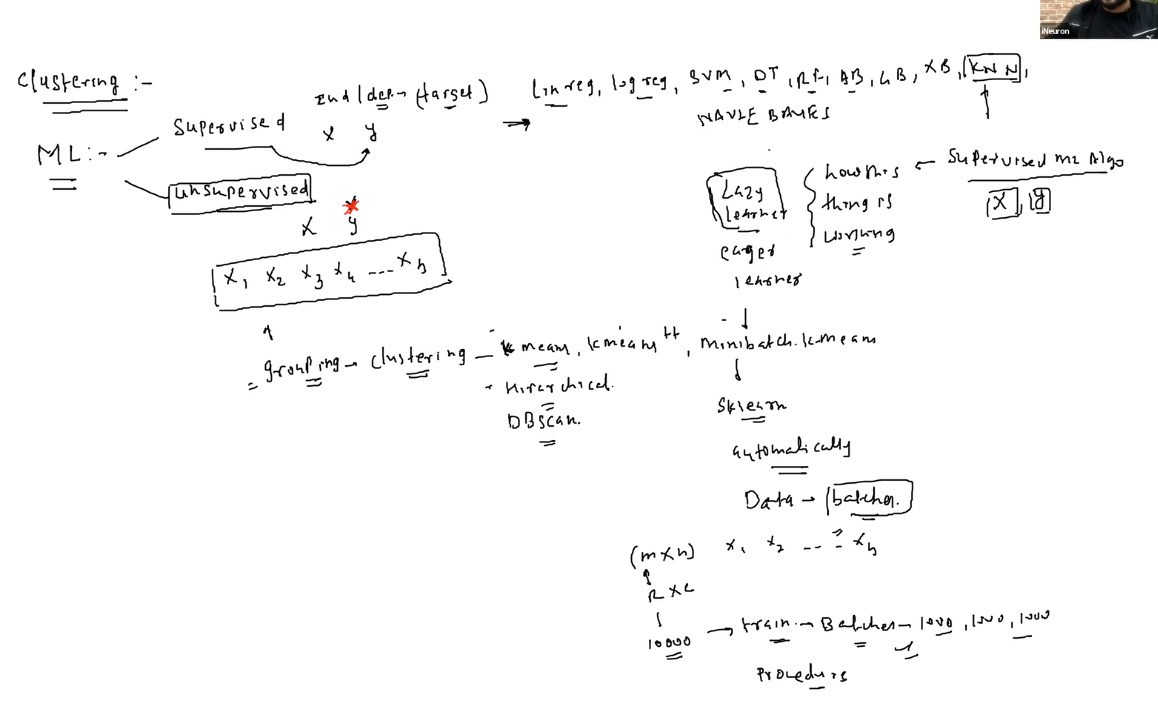

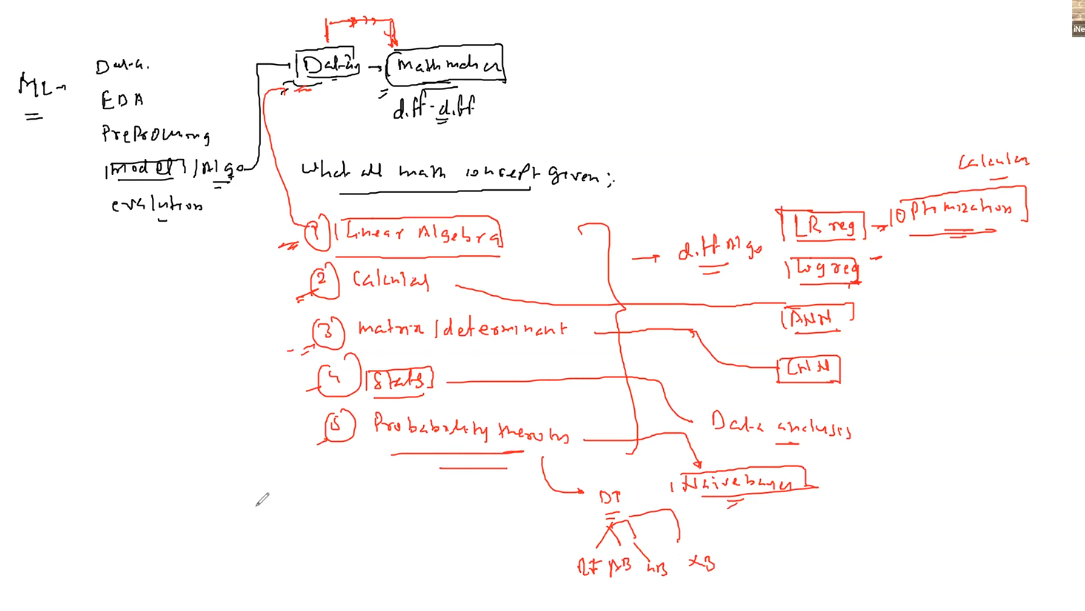

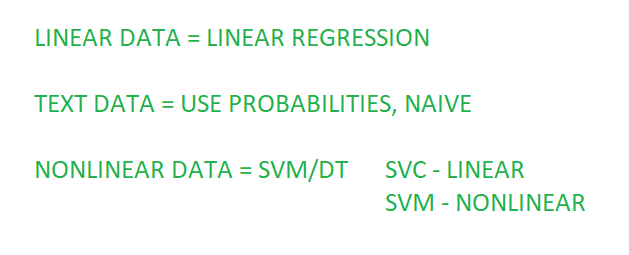

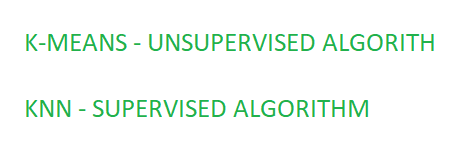

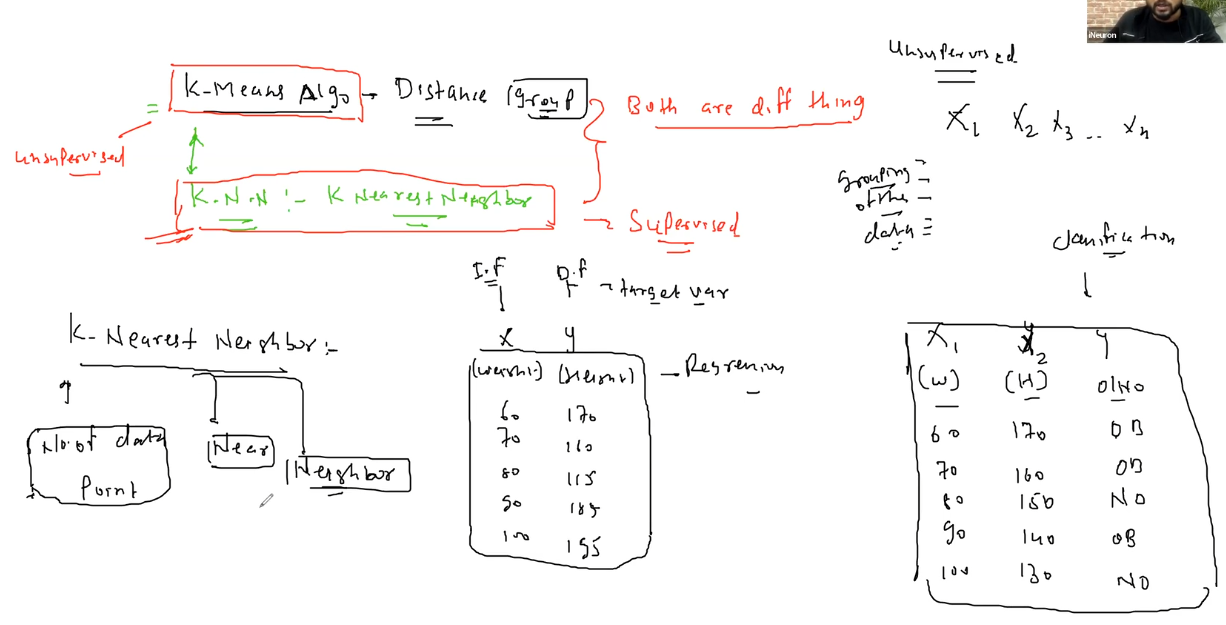

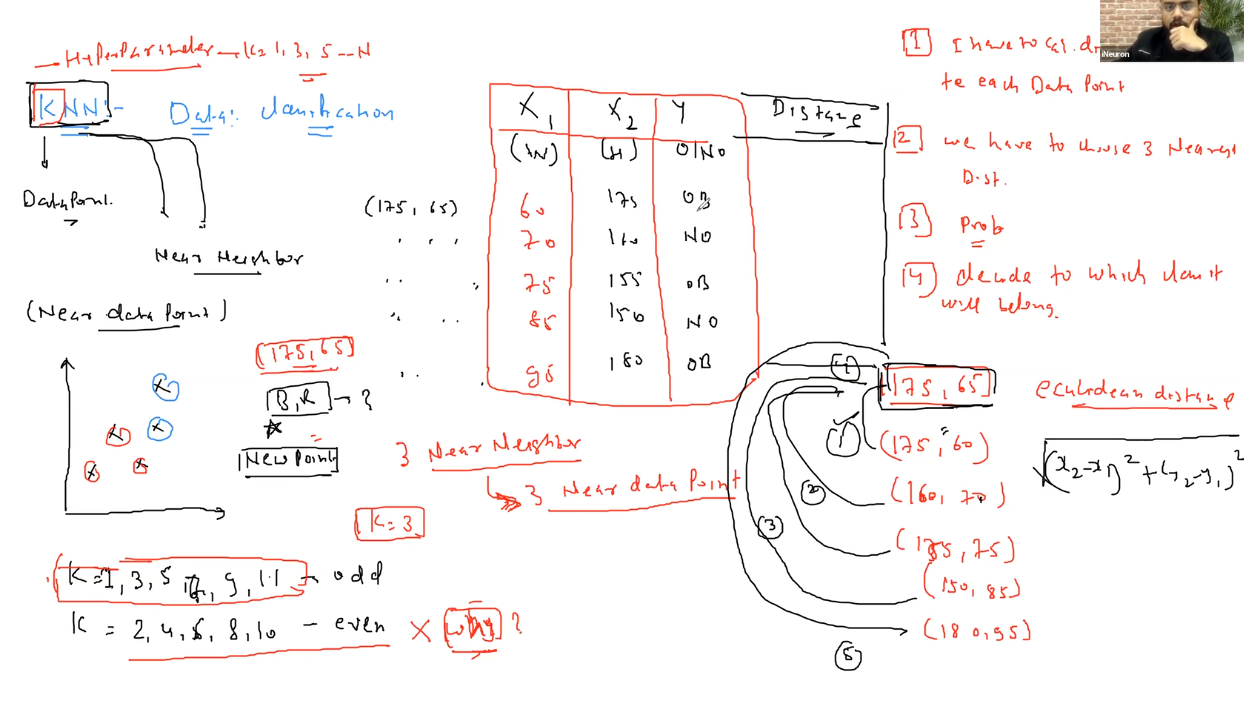

* Calculates the distance to each data point
* if k=3 then we chose the 3 nearest distances
* gets the probability
* decide to which class it will belong

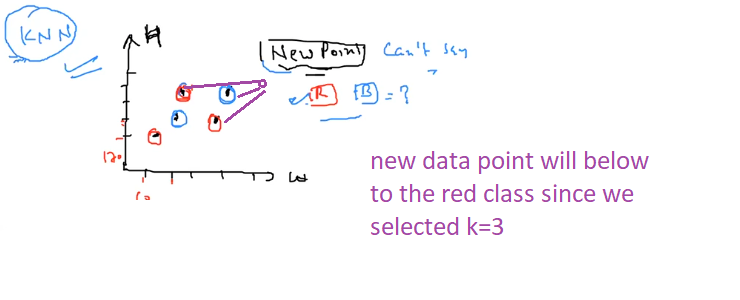

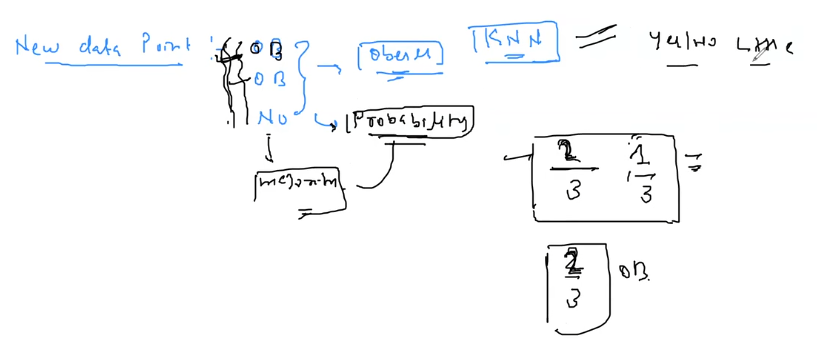

### * KNN is not a ML is a LAZY LEARNER

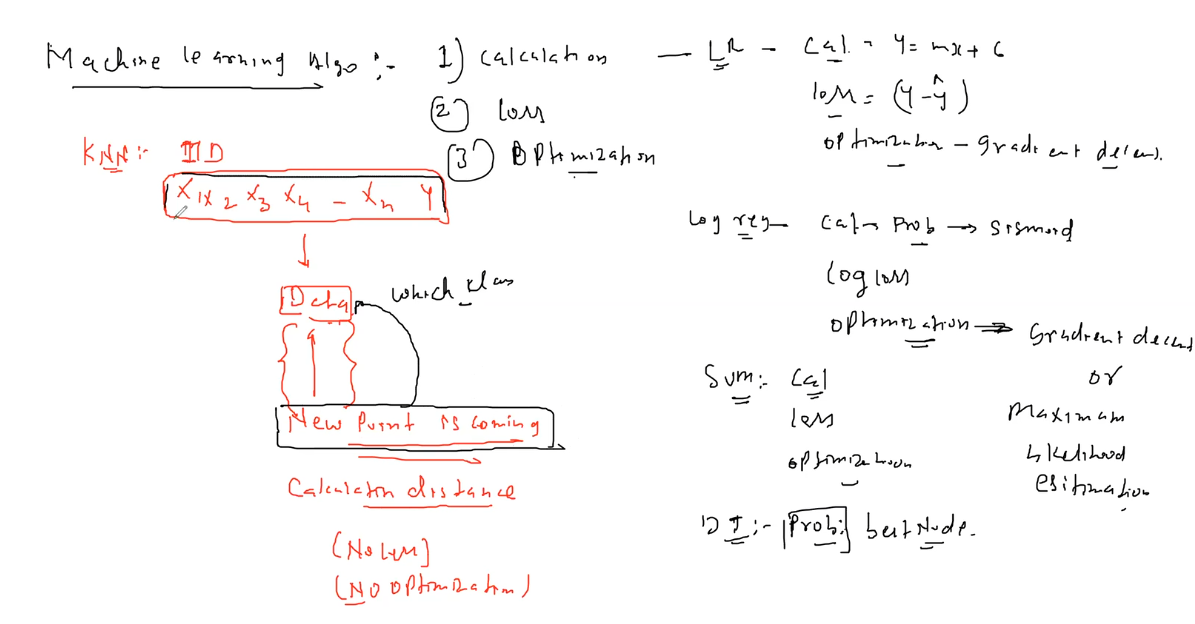

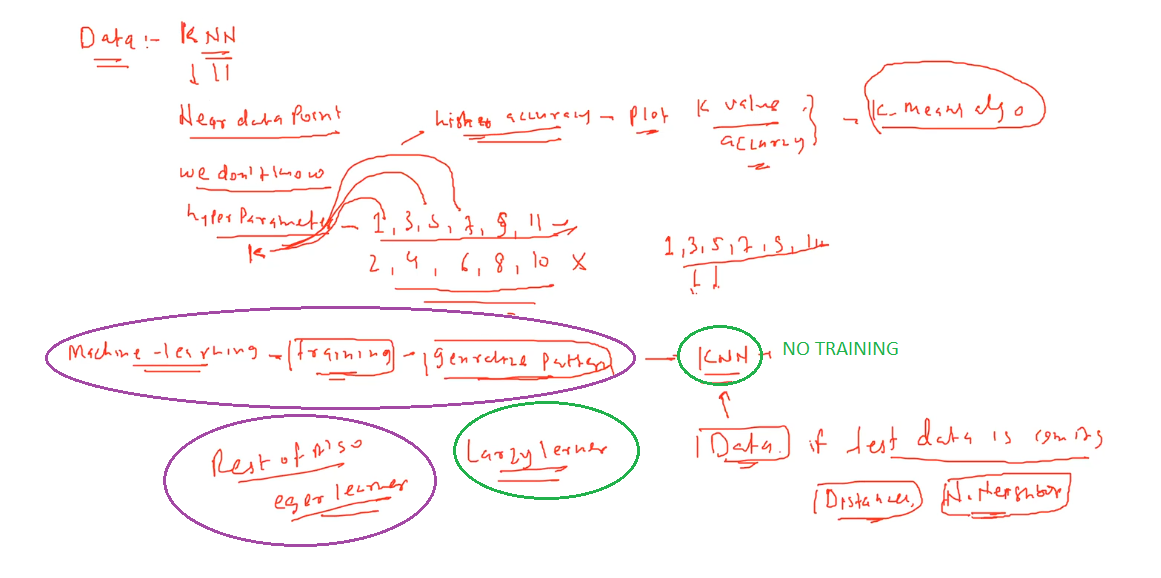

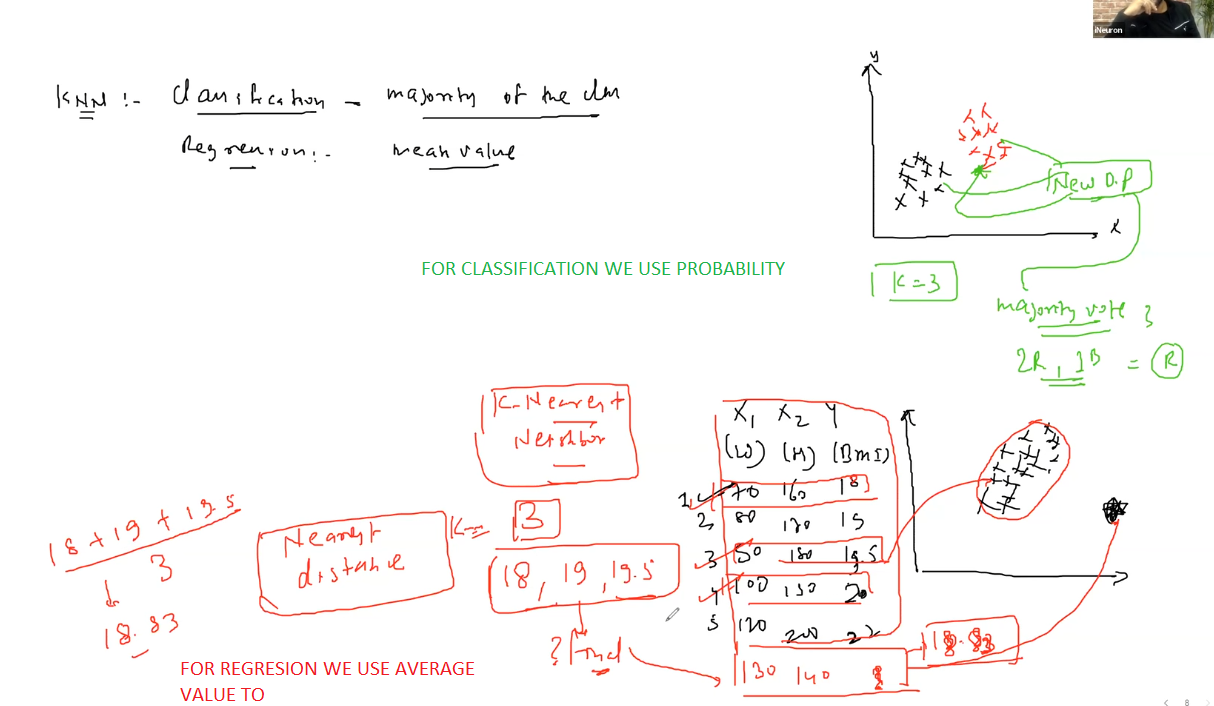

### * HOW DO YOU CALCULATE THE DISTANCE WHEN YOU HAVE CATEGORICAL VARIABLES?

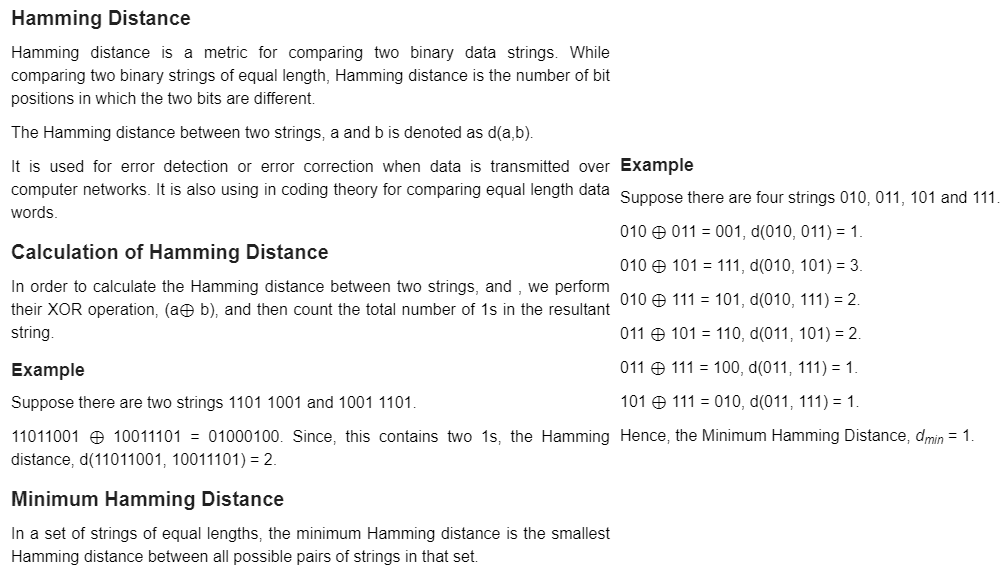

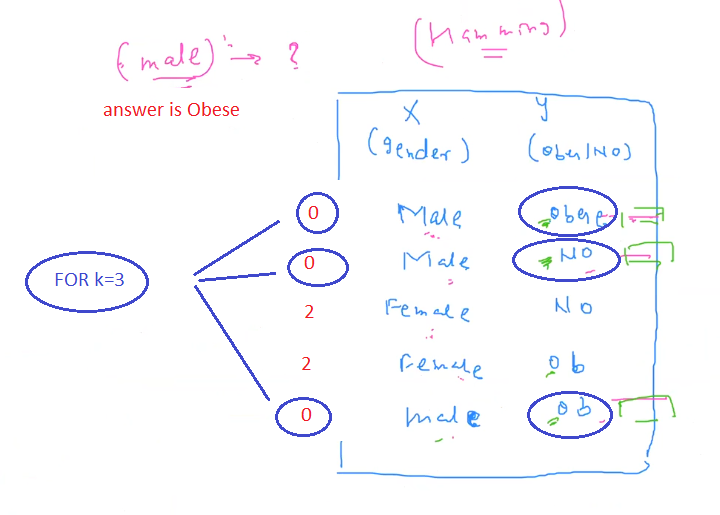

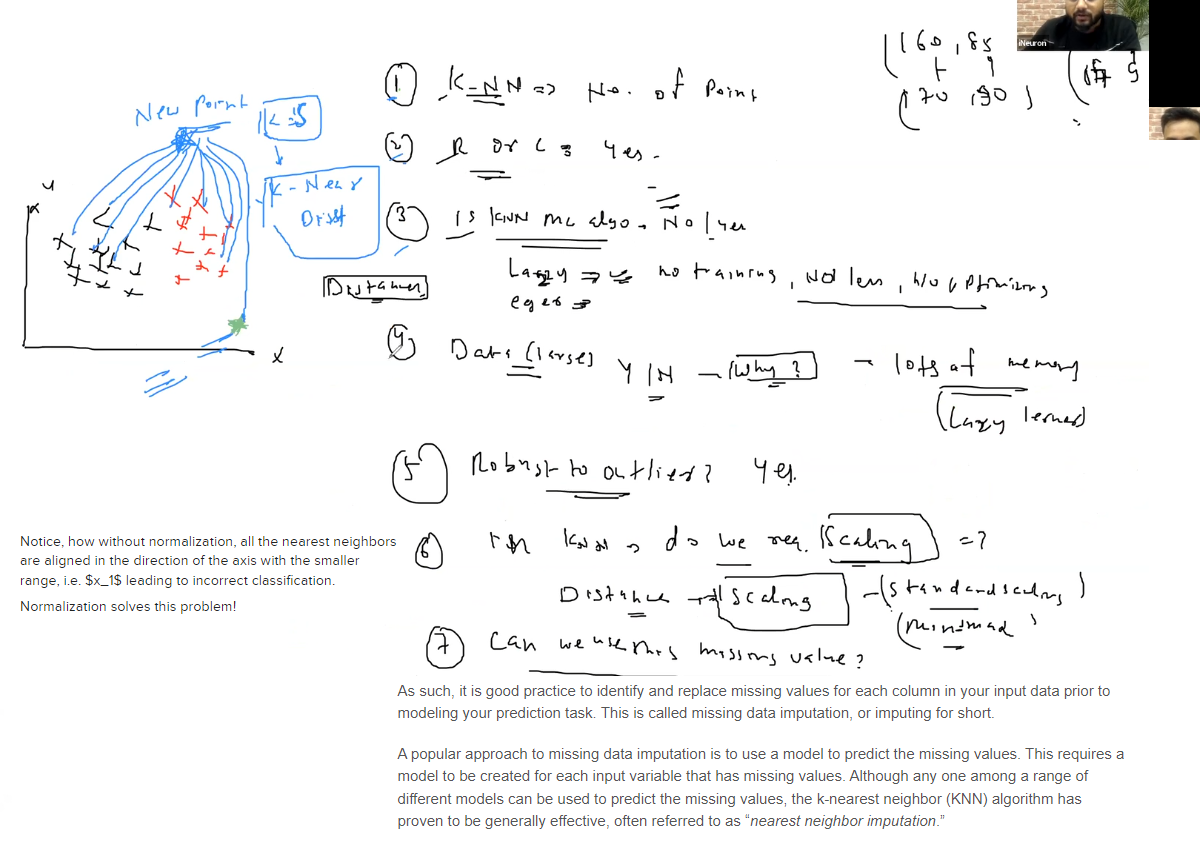

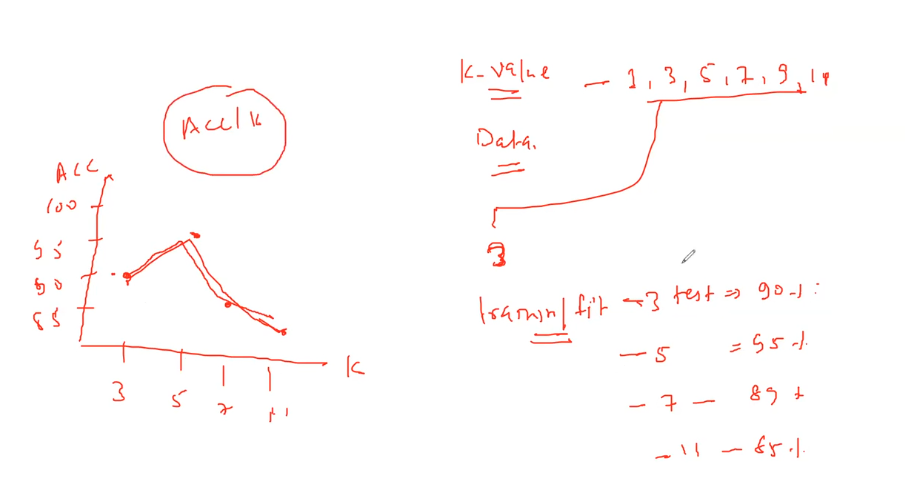


K Nearest Neighbour Easily Explained with Implementation

https://www.youtube.com/watch?v=wTF6vzS9fy4

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("C:\\Users\\rivil\\Desktop\\deleteme\\Classified_Data.txt", index_col=0)
df

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0    0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1    0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2    0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3    1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4    1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240  0.746811   
996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540  1.055928   
997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738  0.386802   
998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859  0.855806   
999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762  0.778234   

          PJF       HQE       NXJ  TARGET CLASS  
0    0.643798  0.879422  1.231409             1  
1    1.013546  0.621552  1.492702             0  
2    1.154483  0.957877  1.285597             0  
3    1.380003  1.522692  1.153093             1  
4    0.646691  1.463812  1.419167             1  
..        ...       ...       ...           ...  
995  0.319752  1.117340  1.348517             1  
996  0.713193  0.958684  1.663489             0  
997  0.389584  0.919191  1.385504             1  
998  1.061338  1.277456  1.188063             1  
999  0.907962  1.257190  1.364837             1  

[1000 rows x 11 columns]

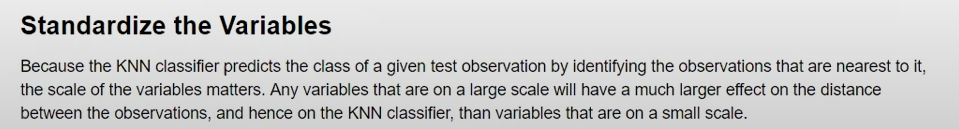

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop("TARGET CLASS",axis=1))   # calculates the scaling values

StandardScaler()

In [14]:
scaled_features = scaler.transform(df.drop("TARGET CLASS",axis=1))  # applies scaling to the features
df_feat_sc = pd.DataFrame(scaled_features, columns=df.columns[:-1])  
df_feat_sc
                          

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0   -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1   -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2   -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3    0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4    1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.211653 -0.312490  0.065163 -0.259834  0.017567 -1.395721 -0.849486   
996 -1.292453 -0.616901  0.369613  0.482648  1.569891  1.273495  0.362784   
997  0.641777 -0.513083 -0.179205  1.022255 -0.539703 -0.229680 -2.261339   
998  0.467072 -0.982786 -1.465194 -0.071465  2.368666  0.001269 -0.422041   
999 -0.387654 -0.595894 -1.431398  0.512722 -0.402552 -2.026512 -0.726253   

          PJF       HQE       NXJ  
0   -1.482368 -0.949719 -0.643314  
1   -0.202240 -1.828051  0.636759  
2    0.285707 -0.682494 -0.377850  
3    1.066491  1.241325 -1.026987  
4   -1.472352  1.040772  0.276510  
..        ...       ...       ...  
995 -2.604264 -0.139347 -0.069602  
996 -1.242110 -0.679746  1.473448  
997 -2.362494 -0.814261  0.111597  
998 -0.036777  0.406025 -0.855670  
999 -0.567789  0.336997  0.010350  

[1000 rows x 10 columns]

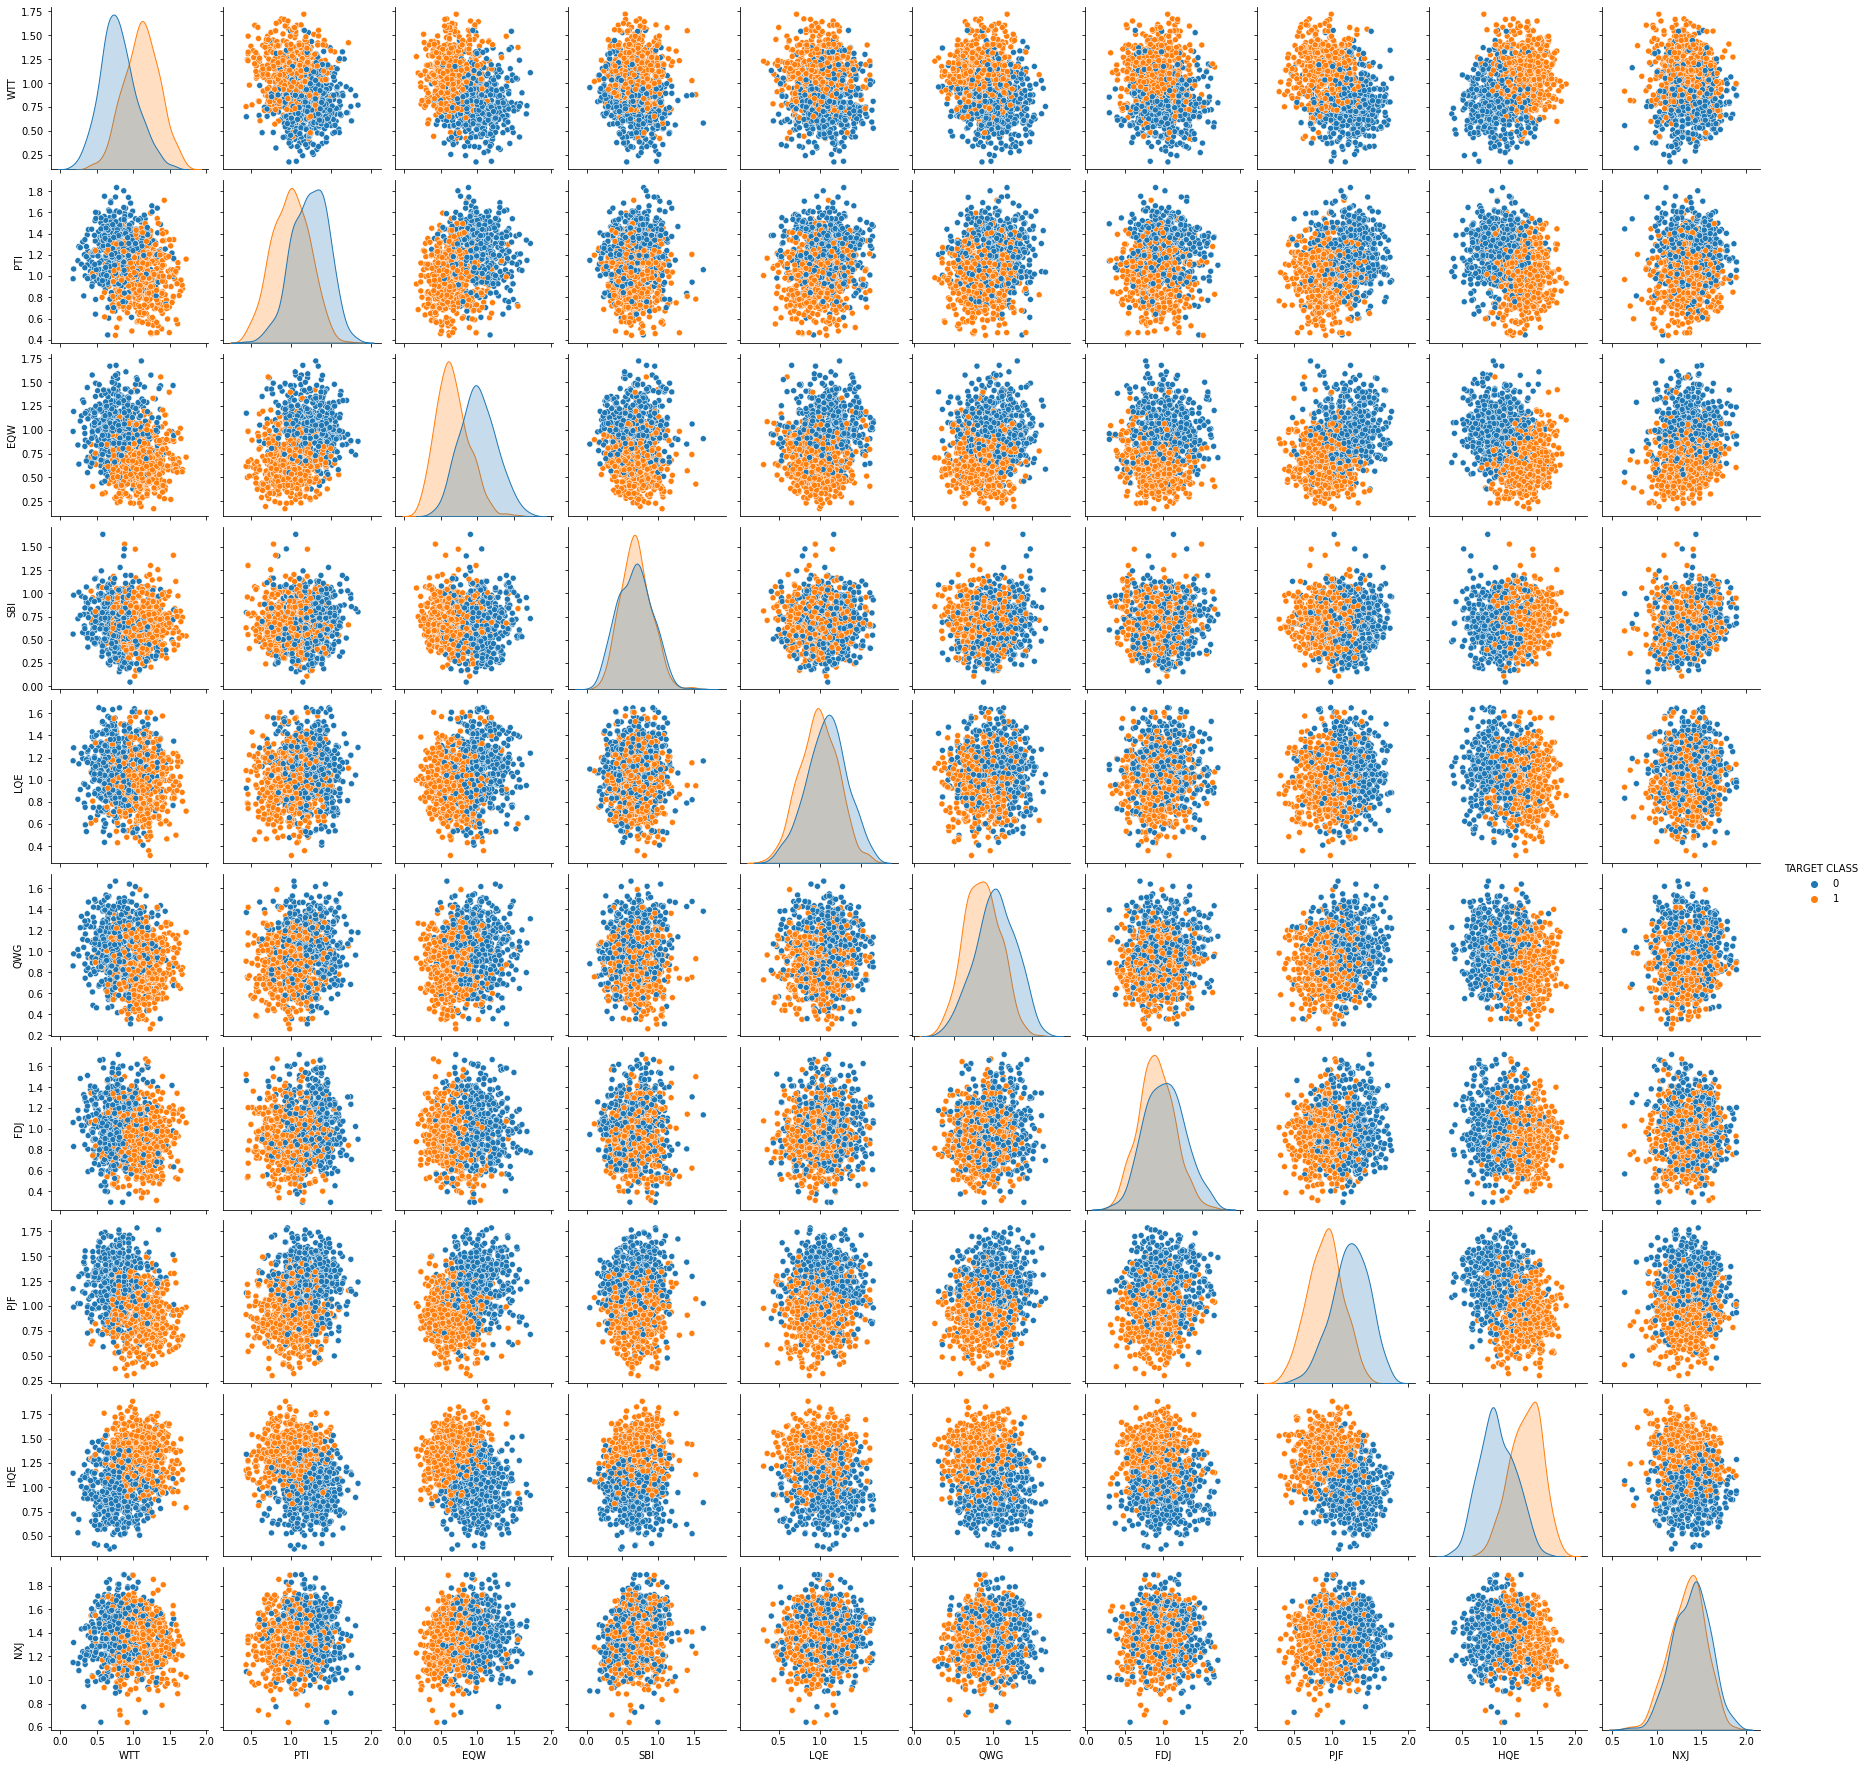

In [15]:
# Pair plot
sns.pairplot(df, hue="TARGET CLASS")

In [16]:
# split the data
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_sc,df["TARGET CLASS"], test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 10), (200, 10), (800,), (200,))

In [21]:
# knn, we are trying to come up with a model to predict wheter someone will TARGET CLASS or not, start with k=1
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)  # start with k=1, so we can derive the proper k value
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [25]:
# evaluations
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score

In [26]:
confusion_matrix(y_test,y_pred)

array([[98,  7],
       [ 6, 89]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.93      0.94      0.93        95

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [33]:
# Choosing a K value
# you can use any of the next methods below

accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feat_sc, df["TARGET CLASS"], cv=10)  # entire dataset used
    accuracy_rate.append(score.mean())
    

Text(0, 0.5, 'accuracy_rate')

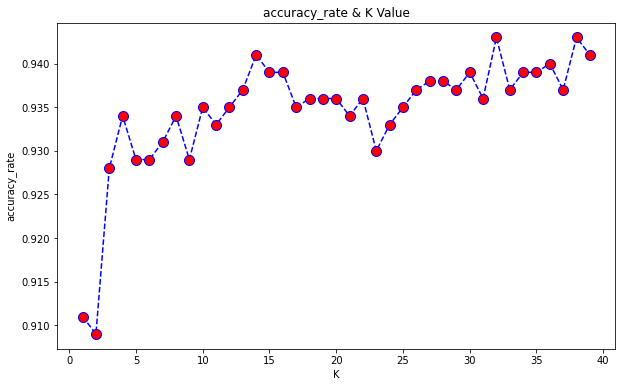

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("accuracy_rate & K Value")
plt.xlabel("K")
plt.ylabel("accuracy_rate")

In [43]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feat_sc, df["TARGET CLASS"], cv=10)  # entire dataset used
    error_rate.append(1-score.mean())
    

Text(0, 0.5, 'error rate')

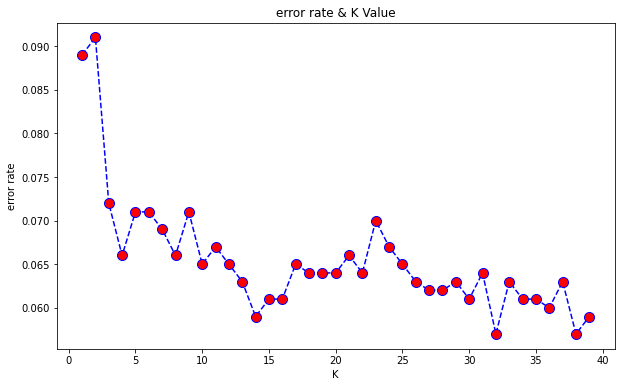

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("error rate & K Value")
plt.xlabel("K")
plt.ylabel("error rate")

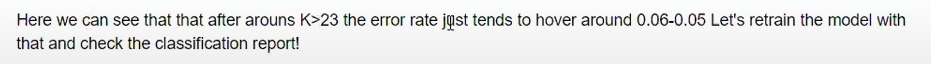

In [45]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)                    # splitted data used
    y_pred_i = knn.predict(X_test)    
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'error rate')

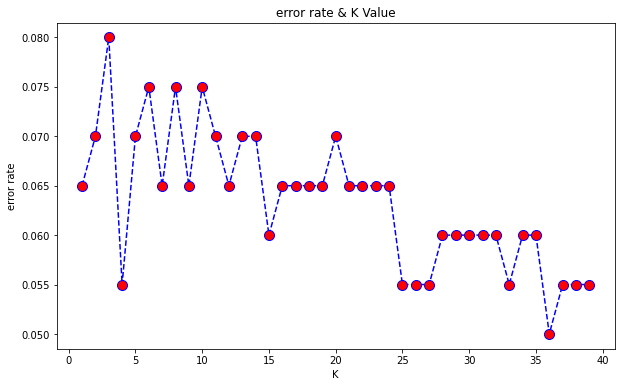

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("error rate & K Value")
plt.xlabel("K")
plt.ylabel("error rate")

In [48]:
# Lets compare k=1 vs k=23

knn = KNeighborsClassifier(n_neighbors=1)  # start with k=1, so we can derive the proper k value
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("K=1\n")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
      


K=1

[[98  7]
 [ 6 89]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.93      0.94      0.93        95

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [49]:
knn = KNeighborsClassifier(n_neighbors=23)  # start with k=23, so we can derive the proper k value
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("K=23\n")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

K=23

[[99  6]
 [ 7 88]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.94      0.93      0.93        95

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



In [50]:
knn = KNeighborsClassifier(n_neighbors=14)  # start with k=14, so we can derive the proper k value
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("K=14\n")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

K=14

[[100   5]
 [  9  86]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       105
           1       0.95      0.91      0.92        95

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



#KD TREE 2D

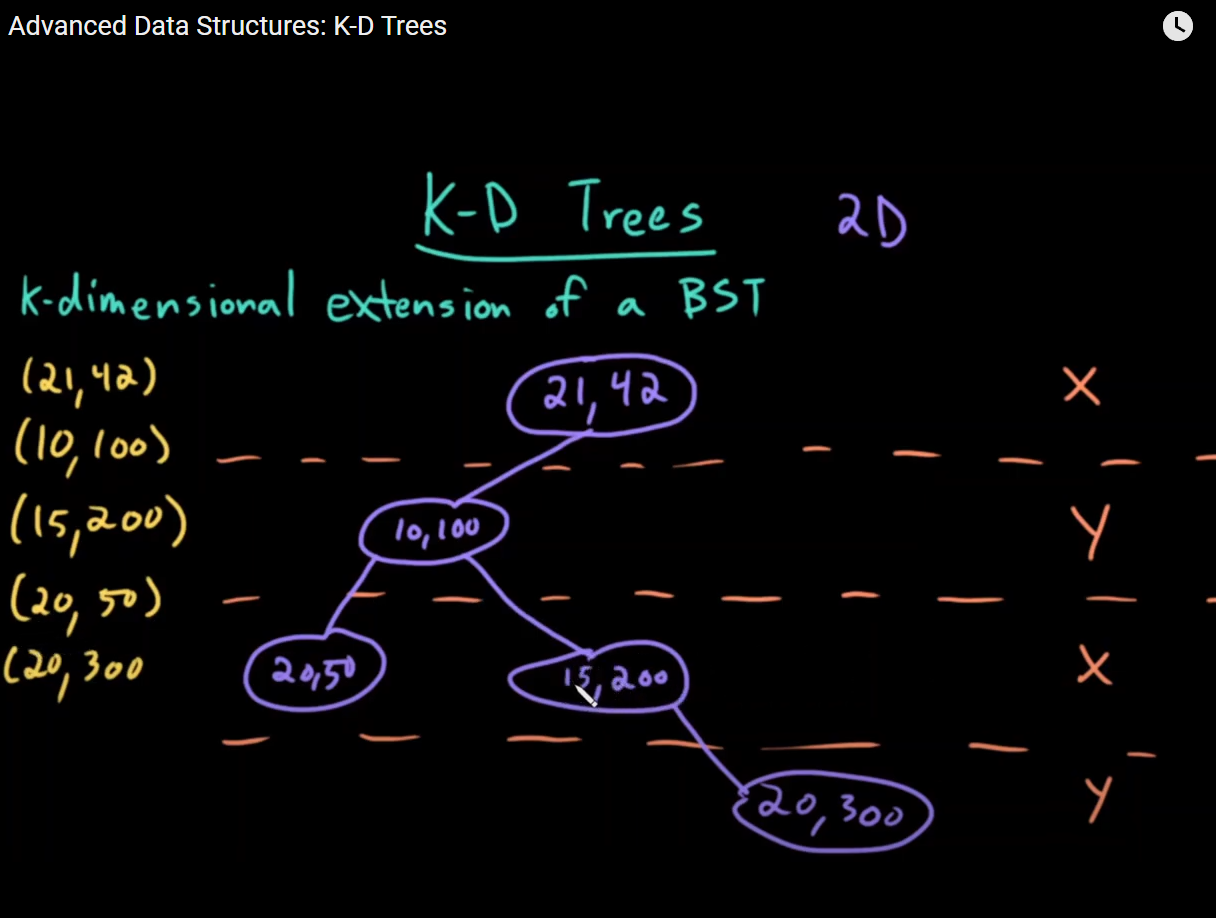